In [1]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

In [2]:
env = gym.make('gym_pdw:pdw-v0')

In [3]:
# Epsilon-greedy action selection
def select_action(epsilon, state, Q):
    if np.random.uniform(0,1) < epsilon:
        action = env.random_action()
    else:
        action = np.argmax(Q[:,state[0],state[1]])
    return action

In [4]:
# Q function update 
def update(state, action, reward, next_state, next_action, E, Q):
    error = reward + gamma*Q[next_action][next_state[0],next_state[1]] - Q[action][state[0],state[1]]
    Q = Q + alpha*error*E
    
    return Q

In [9]:
def SARSA_lambda(gamma, alpha, epsilon, episodes, lambda_val):
    
    # Set the goal variant
    goal_pos = env.set_goal('A')

    # Setting terminal action-state value 
    Terminal_state = goal_pos

    # Initializing Q function values to zero
    Q = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

        
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])
    
    for episode in range(episodes):

        env.reset()
        
        curr_state = env.get_state()
        action = env.random_action()
        
#         print(curr_state ,"init====================")

        E = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

        while True:
            
            if steps[episode] != 0:
                action = select_action(epsilon, curr_state, Q)
            
            next_state, reward = env.step(action)
            next_action = select_action(epsilon, next_state, Q)

            # Update eligibility traces
            E *= gamma*lambda_val
            E[action][curr_state[0],curr_state[1]] += 1
            
            # Update Q values
            Q = update(curr_state, action, reward, next_state, next_action, E, Q)
            
            
            steps[episode] +=1
            avg_reward[episode] = avg_reward[episode] + (reward - avg_reward[episode])/steps[episode]
            
            
            curr_state = next_state
#             print(curr_state, "curr_state", env.start_positions)

            if curr_state == goal_pos:
                print("yes", steps[episode])
                break
    
    return avg_reward, steps, Q

In [6]:
def plot_sarsa_lambda(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
#     plt.show()


In [7]:
def plot_compare(avg_reward_all, steps_all, lambda_vals):
    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of c
    colors = ['k', 'r', 'g', 'm', 'y','k', 'c']

    # For each value of c, plot the average reward vs steps
    for i in range(len(avg_reward_all)):
        fig1.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # For each c, plot the % times optimal arm selected vs steps
    for i in range(len(steps_all)):
        fig2.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # Labelling the  plot
    fig1.title.set_text('For all lambdas Average reward vs episodes')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Labelling the plot
    fig2.title.set_text('For all lambdas steps vs episodes')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()



yes 468.0
yes 460.0
yes 97.0
yes 323.0
yes 356.0
yes 100.0
yes 235.0
yes 379.0
yes 303.0
yes 458.0
yes 523.0
yes 1107.0
yes 68.0
yes 298.0
yes 503.0
yes 642.0
yes 509.0
yes 114.0
yes 143.0
yes 419.0
yes 53.0
yes 598.0
yes 953.0
yes 131.0
yes 461.0
yes 103.0
yes 693.0
yes 420.0
yes 1362.0
yes 174.0
yes 66.0
yes 1646.0
yes 425.0
yes 312.0
yes 87.0
yes 541.0
yes 398.0
yes 922.0
yes 240.0
yes 40.0
yes 443.0
yes 239.0
yes 1135.0
yes 217.0
yes 784.0
yes 1775.0
yes 38.0
yes 50.0
yes 396.0
yes 372.0
yes 175.0
yes 649.0
yes 631.0
yes 720.0
yes 1457.0
yes 98.0
yes 816.0
yes 1918.0
yes 44.0
yes 480.0
yes 354.0
yes 261.0
yes 529.0
yes 199.0
yes 258.0
yes 294.0
yes 104.0
yes 122.0
yes 83.0
yes 457.0
yes 462.0
yes 765.0
yes 654.0
yes 68.0
yes 804.0
yes 729.0
yes 306.0
yes 341.0
yes 219.0
yes 1184.0
yes 280.0
yes 61.0
yes 188.0
yes 451.0
yes 538.0
yes 60.0
yes 647.0
yes 384.0
yes 121.0
yes 1936.0
yes 234.0
yes 231.0
yes 41.0
yes 116.0
yes 802.0
yes 334.0
yes 923.0
yes 63.0
yes 108.0
yes 152.0
yes 39.

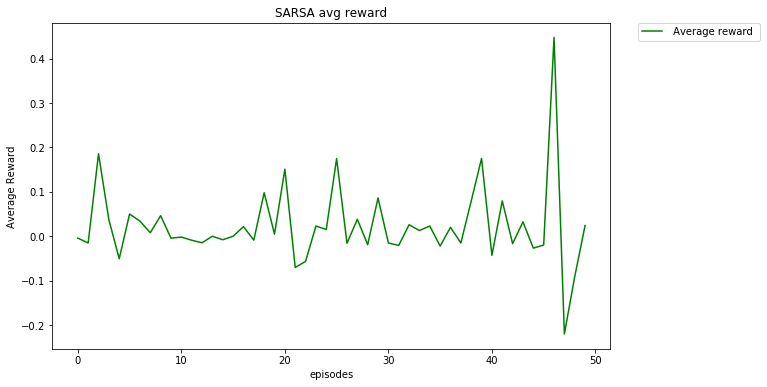

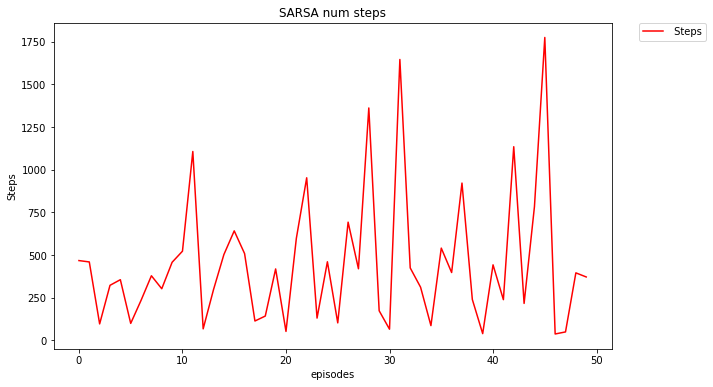

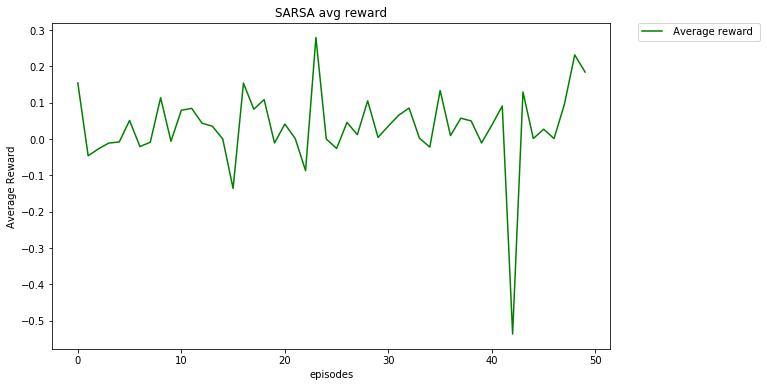

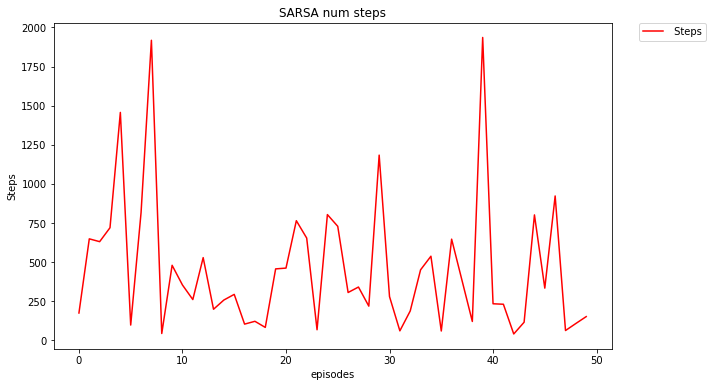

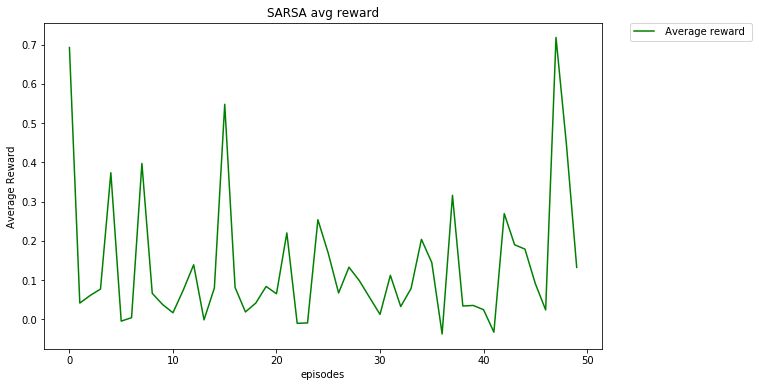

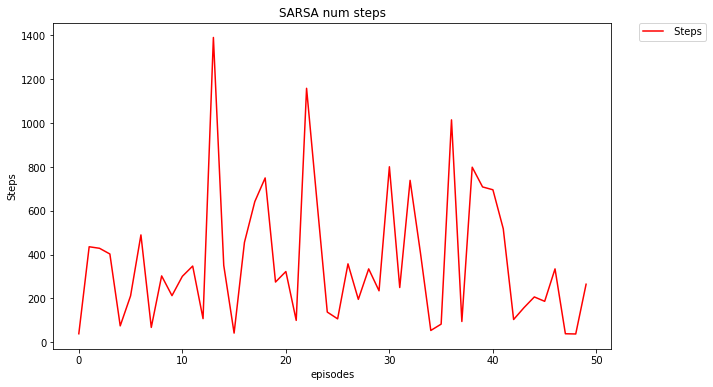

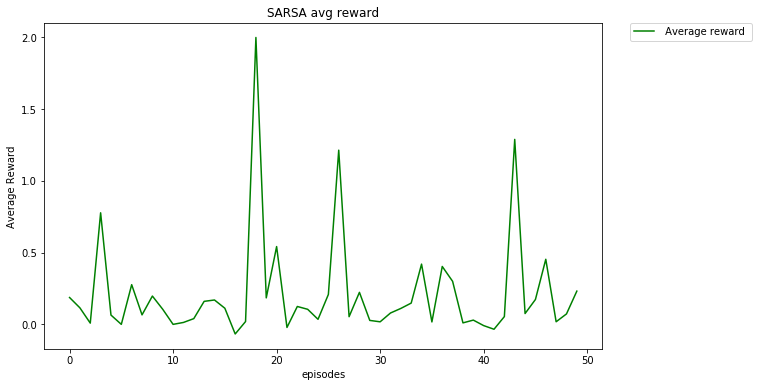

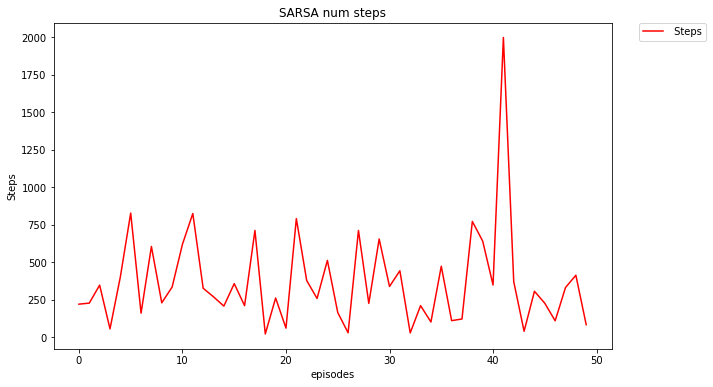

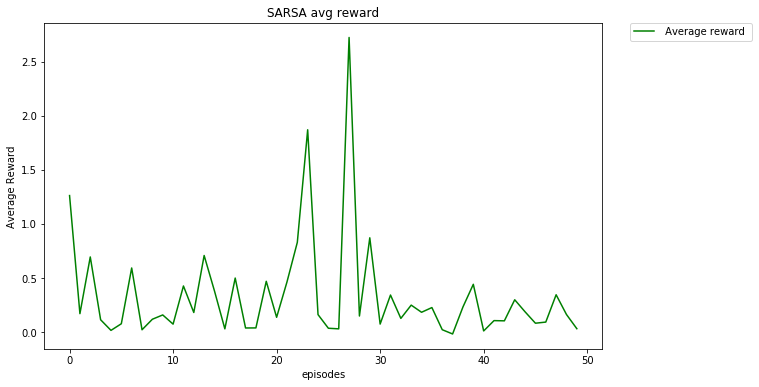

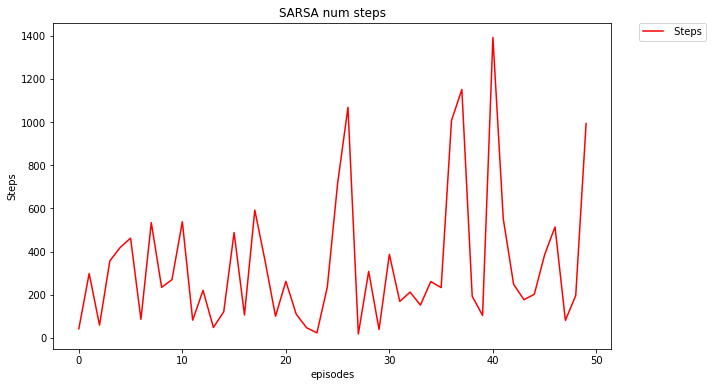

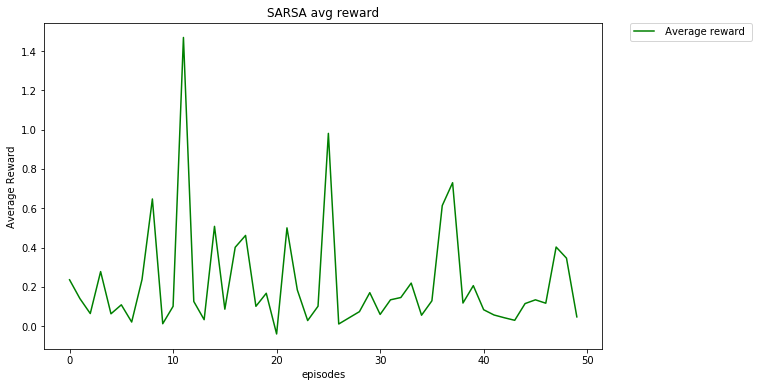

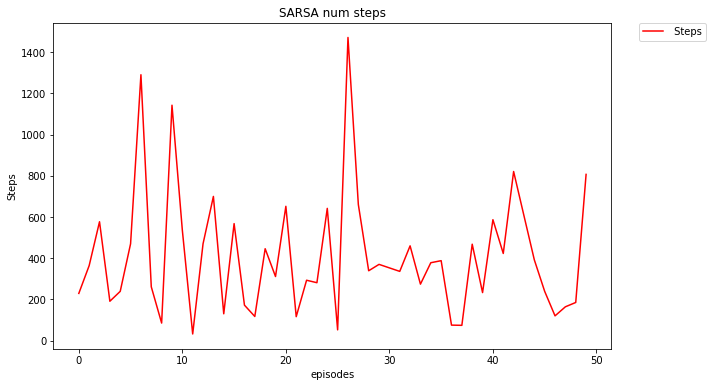

In [10]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.01
    epsilon = 0.1
    episodes = 50
    
    lambda_vals = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
    
    avg_reward_all = []
    steps_all = []
    
    for i in range(len(lambda_vals)):
        avg_reward, steps, Q = SARSA_lambda(gamma,alpha,epsilon, episodes, lambda_vals[i])
        
        avg_reward_all.append(avg_reward)
        steps_all.append(steps)
        
        plot_sarsa_lambda(avg_reward_all[i], steps_all[i], episodes)
    plt.show
    